### Ülkelere ilişkin kişi başı gayri safi yurt içi hasıla verilerini alın:
Birleşmiş Milletler İnsani Gelişmişlik Raporları (Human Deveoplemen Reports) sitesinde, farklı boyutlar altında çeşitli göstergeleri içeren, ülkelerin 1990-2015 yılları arasındaki İnsani Gelişmişlik Verileri (http://hdr.undp.org/en/data) bulunmaktadır. Bu verilerden "Income/composition of resources" boyutu altında yer alan, "Gross domestic product (GDP) per capita" (kişi başı gayri safi yurt içi hasıla) göstergesine ilişkin verileri indirin ("Gross domestic product (GDP) per capita (2011 PPP $).csv"). Bu dosyadan verileri yükleyin ve bir DataFrame oluşturun.

### Veri Temizleme&Düzenleme:
```
1- Kodlamayı, ISO-8859-1 olarak ayarlayın (read_csv fonksiyonu içindeki encoding parametresi ile)
2- Dosyanın ilk satırını atlayın
3- Son satırı silin
4- Boş sütunları (bütün değerleri 'NaN' olan sütunları) silin
5- Herhangi bir verisi boş ('NaN') olan ülkeleri silin
6- Country sütununda bulunan değerlerin sonundaki ekstra boşlukları silin
7- Country sütunundaki ülke isimlerinin bazılarını aşağıdaki şekilde yeniden adlandırın:
    'Korea (Republic of)':'South Korea',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'The former Yugoslav Republic of Macedonia':'Macedonia',
    'Hong Kong, China (SAR)':'Hong Kong'
```

In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
gdp = pd.read_csv('gdp.csv', 'encoding=ISO-8859-1',skiprows=1,engine='python',delimiter=',')
gdp = gdp[:-1]
#gdp

In [128]:
gdp = gdp.dropna(axis=1,how='all')
gdp = gdp.dropna(axis=0,how='any')
gdp

,HDI Rank (2015),Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015
1,75,Albania,4303.0,3899.0,5165.0,7046.0,9374.0,9640.0,9792.0,9913.0,10122.0,10397.0
2,83,Algeria,10239.0,9297.0,10211.0,12327.0,12898.0,13026.0,13209.0,13314.0,13554.0,13823.0
3,150,Angola,4806.0,3245.0,3831.0,4311.0,6492.0,6524.0,6636.0,6858.0,6956.0,6937.0
4,62,Antigua and Barbuda,17154.0,17167.0,19319.0,21414.0,20567.0,19988.0,20577.0,20297.0,21062.0,21615.0
5,84,Armenia,3736.0,2169.0,2919.0,5297.0,6508.0,6803.0,7268.0,7473.0,7699.0,7899.0
6,2,Australia,28572.0,30348.0,35245.0,38819.0,41363.0,41763.0,42541.0,42845.0,43268.0,43655.0
7,24,Austria,31113.0,33545.0,38623.0,40954.0,42965.0,44022.0,44154.0,44038.0,43872.0,43893.0
8,78,Azerbaijan,8513.0,3320.0,4459.0,8052.0,15950.0,15754.0,15888.0,16593.0,16715.0,16695.0
9,58,Bahamas,24281.0,22111.0,25847.0,25385.0,22894.0,22665.0,22815.0,22490.0,22411.0,22394.0
10,47,Bahrain,35398.0,43244.0,45156.0,44667.0,40238.0,39677.0,40251.0,41932.0,43408.0,44182.0


In [129]:
print(len(gdp.iloc[1].Country))
#gdp['Country'] = gdp['Country'].str.strip()
gdp.Country = gdp.Country.apply(lambda text: text.strip())
print(len(gdp.iloc[1].Country))

8
7


In [130]:
print(gdp.loc[180].Country)
mapping = {'Korea (Republic of)':'South Korea',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'The former Yugoslav Republic of Macedonia':'Macedonia',
    'Hong Kong, China (SAR)':'Hong Kong'}
gdp.Country.replace(mapping,inplace=True)
print(gdp.loc[180].Country)

Venezuela (Bolivarian Republic of)
Venezuela


### Ülkelere ilişkin coğrafi verileri alın:
Geonames veri tabanından ülkelere ilişkin coğrafi verileri içeren dosyadan (http://download.geonames.org/export/dump/countryInfo.txt) verileri yükleyin ve başka bir DataFrame daha oluşturun.

### Veri Temizleme&Düzenleme:
```
1- Dosyanın ilk 50 satırını atlayın
2- Son satırı silin
3- '#ISO' sütununun ismini 'CountryCode' olarak değiştirin
4- 'ISO3', 'ISO-Numeric', 'fips', 'EquivalentFipsCode', 'Postal Code Format', 'Postal Code Regex' ve 'geonameid' sütunlarını silin
5- Kıta (Continent) değeri boş ('NaN') olan ülkelerin kıta değerini 'NA' (North America) olarak değiştirin
```

In [131]:
data = pd.read_csv('countryInfo.txt', skiprows=50,sep="\t")
data = data[:-1]
data

,#ISO,ISO3,ISO-Numeric,fips,Country,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Postal Code Format,Postal Code Regex,Languages,geonameid,neighbours,EquivalentFipsCode
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.00,84000,EU,.ad,EUR,Euro,376,AD###,^(?:AD)*(\d{3})$,ca,3041565,"ES,FR",NaN
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.00,4975593,AS,.ae,AED,Dirham,971,NaN,NaN,"ar-AE,fa,en,hi,ur",290557,"SA,OM",NaN
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.00,29121286,AS,.af,AFN,Afghani,93,NaN,NaN,"fa-AF,ps,uz-AF,tk",1149361,"TM,CN,IR,TJ,PK,UZ",NaN
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.00,86754,NaN,.ag,XCD,Dollar,+1-268,NaN,NaN,en-AG,3576396,NaN,NaN
4,AI,AIA,660,AV,Anguilla,The Valley,102.00,13254,NaN,.ai,XCD,Dollar,+1-264,NaN,NaN,en-AI,3573511,NaN,NaN
5,AL,ALB,8,AL,Albania,Tirana,28748.00,2986952,EU,.al,ALL,Lek,355,NaN,NaN,"sq,el",783754,"MK,GR,ME,RS,XK",NaN
6,AM,ARM,51,AM,Armenia,Yerevan,29800.00,2968000,AS,.am,AMD,Dram,374,######,^(\d{6})$,hy,174982,"GE,IR,AZ,TR",NaN
7,AO,AGO,24,AO,Angola,Luanda,1246700.00,13068161,AF,.ao,AOA,Kwanza,244,NaN,NaN,pt-AO,3351879,"CD,NA,ZM,CG",NaN
8,AQ,ATA,10,AY,Antarctica,NaN,14000000.00,0,AN,.aq,NaN,NaN,NaN,NaN,NaN,NaN,6697173,NaN,NaN
9,AR,ARG,32,AR,Argentina,Buenos Aires,2766890.00,41343201,SA,.ar,ARS,Peso,54,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$","es-AR,en,it,de,fr,gn",3865483,"CL,BO,UY,PY,BR",NaN


In [132]:
mapping = {'#ISO':"CountryCode"}
data.rename(columns=mapping,inplace=True)
data.head()

,CountryCode,ISO3,ISO-Numeric,fips,Country,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Postal Code Format,Postal Code Regex,Languages,geonameid,neighbours,EquivalentFipsCode
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,84000,EU,.ad,EUR,Euro,376,AD###,^(?:AD)*(\d{3})$,ca,3041565,"ES,FR",NaN
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,4975593,AS,.ae,AED,Dirham,971,NaN,NaN,"ar-AE,fa,en,hi,ur",290557,"SA,OM",NaN
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,29121286,AS,.af,AFN,Afghani,93,NaN,NaN,"fa-AF,ps,uz-AF,tk",1149361,"TM,CN,IR,TJ,PK,UZ",NaN
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,86754,NaN,.ag,XCD,Dollar,+1-268,NaN,NaN,en-AG,3576396,NaN,NaN
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NaN,.ai,XCD,Dollar,+1-264,NaN,NaN,en-AI,3573511,NaN,NaN


In [133]:
toRemove = ['ISO3', 'ISO-Numeric', 'fips', 'EquivalentFipsCode', 'Postal Code Format', 'Postal Code Regex' , 'geonameid']
data.drop(toRemove, inplace=True, axis=1)
data

,CountryCode,Country,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Languages,neighbours
0,AD,Andorra,Andorra la Vella,468.00,84000,EU,.ad,EUR,Euro,376,ca,"ES,FR"
1,AE,United Arab Emirates,Abu Dhabi,82880.00,4975593,AS,.ae,AED,Dirham,971,"ar-AE,fa,en,hi,ur","SA,OM"
2,AF,Afghanistan,Kabul,647500.00,29121286,AS,.af,AFN,Afghani,93,"fa-AF,ps,uz-AF,tk","TM,CN,IR,TJ,PK,UZ"
3,AG,Antigua and Barbuda,St. John's,443.00,86754,NaN,.ag,XCD,Dollar,+1-268,en-AG,NaN
4,AI,Anguilla,The Valley,102.00,13254,NaN,.ai,XCD,Dollar,+1-264,en-AI,NaN
5,AL,Albania,Tirana,28748.00,2986952,EU,.al,ALL,Lek,355,"sq,el","MK,GR,ME,RS,XK"
6,AM,Armenia,Yerevan,29800.00,2968000,AS,.am,AMD,Dram,374,hy,"GE,IR,AZ,TR"
7,AO,Angola,Luanda,1246700.00,13068161,AF,.ao,AOA,Kwanza,244,pt-AO,"CD,NA,ZM,CG"
8,AQ,Antarctica,NaN,14000000.00,0,AN,.aq,NaN,NaN,NaN,NaN,NaN
9,AR,Argentina,Buenos Aires,2766890.00,41343201,SA,.ar,ARS,Peso,54,"es-AR,en,it,de,fr,gn","CL,BO,UY,PY,BR"


In [134]:
print(data.Continent.isnull().sum())
data.Continent = data.Continent.fillna(value="NA")
print(data.Continent.isnull().sum())
data.head()

41
0


,CountryCode,Country,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Languages,neighbours
0,AD,Andorra,Andorra la Vella,468.0,84000,EU,.ad,EUR,Euro,376,ca,"ES,FR"
1,AE,United Arab Emirates,Abu Dhabi,82880.0,4975593,AS,.ae,AED,Dirham,971,"ar-AE,fa,en,hi,ur","SA,OM"
2,AF,Afghanistan,Kabul,647500.0,29121286,AS,.af,AFN,Afghani,93,"fa-AF,ps,uz-AF,tk","TM,CN,IR,TJ,PK,UZ"
3,AG,Antigua and Barbuda,St. John's,443.0,86754,NA,.ag,XCD,Dollar,+1-268,en-AG,NaN
4,AI,Anguilla,The Valley,102.0,13254,NA,.ai,XCD,Dollar,+1-264,en-AI,NaN


### Verilerinizi birleştirin:
Ülke adı ('Country') sütunlarının kesişimini kullanarak bu iki veri kümesini birleştirin ve 'Country' sütununu index olarak beirleyin.

In [135]:
merged = pd.merge(data,gdp,on='Country',how='inner')
merged.set_index(merged['Country'],inplace =True)
merged

,CountryCode,Country,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,...,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,AE,United Arab Emirates,Abu Dhabi,82880.0,4975593,AS,.ae,AED,Dirham,971,...,114519.0,106250.0,107206.0,94720.0,57407.0,57594.0,60067.0,62056.0,64563.0,66102.0
Antigua and Barbuda,AG,Antigua and Barbuda,St. John's,443.0,86754,NA,.ag,XCD,Dollar,+1-268,...,17154.0,17167.0,19319.0,21414.0,20567.0,19988.0,20577.0,20297.0,21062.0,21615.0
Albania,AL,Albania,Tirana,28748.0,2986952,EU,.al,ALL,Lek,355,...,4303.0,3899.0,5165.0,7046.0,9374.0,9640.0,9792.0,9913.0,10122.0,10397.0
Armenia,AM,Armenia,Yerevan,29800.0,2968000,AS,.am,AMD,Dram,374,...,3736.0,2169.0,2919.0,5297.0,6508.0,6803.0,7268.0,7473.0,7699.0,7899.0
Angola,AO,Angola,Luanda,1246700.0,13068161,AF,.ao,AOA,Kwanza,244,...,4806.0,3245.0,3831.0,4311.0,6492.0,6524.0,6636.0,6858.0,6956.0,6937.0
Austria,AT,Austria,Vienna,83858.0,8205000,EU,.at,EUR,Euro,43,...,31113.0,33545.0,38623.0,40954.0,42965.0,44022.0,44154.0,44038.0,43872.0,43893.0
Australia,AU,Australia,Canberra,7686850.0,21515754,OC,.au,AUD,Dollar,61,...,28572.0,30348.0,35245.0,38819.0,41363.0,41763.0,42541.0,42845.0,43268.0,43655.0
Azerbaijan,AZ,Azerbaijan,Baku,86600.0,8303512,AS,.az,AZN,Manat,994,...,8513.0,3320.0,4459.0,8052.0,15950.0,15754.0,15888.0,16593.0,16715.0,16695.0
Barbados,BB,Barbados,Bridgetown,431.0,285653,NA,.bb,BBD,Dollar,+1-246,...,13296.0,12417.0,14438.0,15073.0,15347.0,15402.0,15390.0,15339.0,15320.0,15426.0



Ülkelerin, 1990-2015 yıllarını kapsayan 'GDP ortalama' değerlerini bulun ve veri setine yeni bir sütun olarak ekleyin.

In [136]:
years = ['1990', '1995', '2000', '2005', '2010', '2011', '2012', '2013', '2014', '2015']
merged['GDP_ortalama'] = merged[years].mean(axis=1)
merged

,CountryCode,Country,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,...,1995,2000,2005,2010,2011,2012,2013,2014,2015,GDP_ortalama
Country,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,AE,United Arab Emirates,Abu Dhabi,82880.0,4975593,AS,.ae,AED,Dirham,971,...,106250.0,107206.0,94720.0,57407.0,57594.0,60067.0,62056.0,64563.0,66102.0,79048.4
Antigua and Barbuda,AG,Antigua and Barbuda,St. John's,443.0,86754,NA,.ag,XCD,Dollar,+1-268,...,17167.0,19319.0,21414.0,20567.0,19988.0,20577.0,20297.0,21062.0,21615.0,19916.0
Albania,AL,Albania,Tirana,28748.0,2986952,EU,.al,ALL,Lek,355,...,3899.0,5165.0,7046.0,9374.0,9640.0,9792.0,9913.0,10122.0,10397.0,7965.1
Armenia,AM,Armenia,Yerevan,29800.0,2968000,AS,.am,AMD,Dram,374,...,2169.0,2919.0,5297.0,6508.0,6803.0,7268.0,7473.0,7699.0,7899.0,5777.1
Angola,AO,Angola,Luanda,1246700.0,13068161,AF,.ao,AOA,Kwanza,244,...,3245.0,3831.0,4311.0,6492.0,6524.0,6636.0,6858.0,6956.0,6937.0,5659.6
Austria,AT,Austria,Vienna,83858.0,8205000,EU,.at,EUR,Euro,43,...,33545.0,38623.0,40954.0,42965.0,44022.0,44154.0,44038.0,43872.0,43893.0,40717.9
Australia,AU,Australia,Canberra,7686850.0,21515754,OC,.au,AUD,Dollar,61,...,30348.0,35245.0,38819.0,41363.0,41763.0,42541.0,42845.0,43268.0,43655.0,38841.9
Azerbaijan,AZ,Azerbaijan,Baku,86600.0,8303512,AS,.az,AZN,Manat,994,...,3320.0,4459.0,8052.0,15950.0,15754.0,15888.0,16593.0,16715.0,16695.0,12193.9
Barbados,BB,Barbados,Bridgetown,431.0,285653,NA,.bb,BBD,Dollar,+1-246,...,12417.0,14438.0,15073.0,15347.0,15402.0,15390.0,15339.0,15320.0,15426.0,14744.8


Ülkelerin GDP ortalamalarını gösteren bir histogram (hist) çizin.

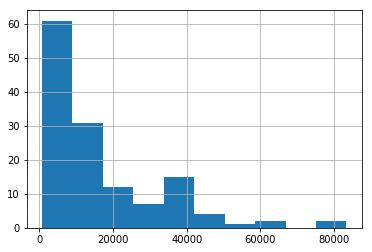

In [137]:
merged.GDP_ortalama.hist()

GDP ortalaması en yüksek ilk 10 ülkeyi gösteren bir sütun (bar) grafik çizin.

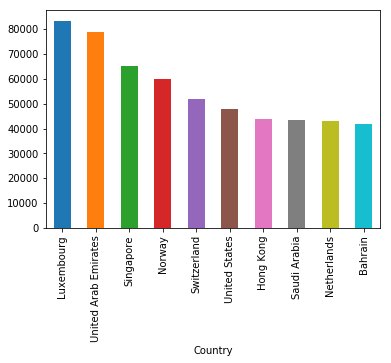

In [138]:
merged.GDP_ortalama.sort_values(ascending=False).head(10).plot(kind='bar')


Her ülkenin kişi başına düşen yüzey alanını hesaplayınız ve kişi başına düşen yüzey alanı en küçük olan ilk 20 ülkeyi gösteren bir sütun grafik çizin.

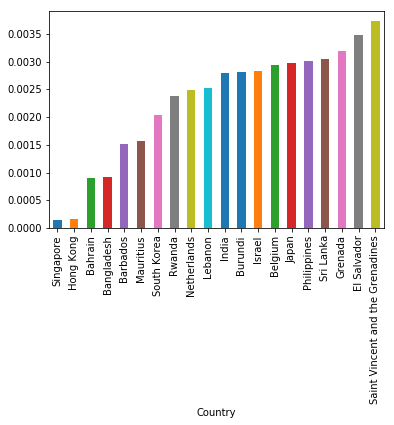

In [139]:
merged['KBDYA'] = merged['Area(in sq km)'] /merged['Population']
merged.KBDYA.sort_values().head(20).plot(kind='bar')


Kıtalara göre 'GDP ortalama' değerlerini gösteren bir sütun grafik çizin.

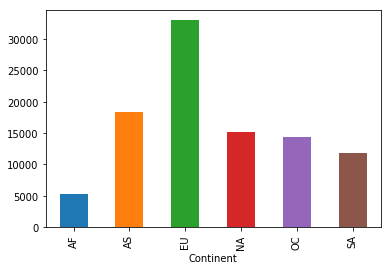

In [140]:
merged.groupby('Continent').GDP_ortalama.mean().plot(kind='bar')

Kıtalara göre toplam nüfus ve toplam alan dağılımlarını gösteren pasta (pie) grafikleri içeren bir şekil (figure) çizin. 

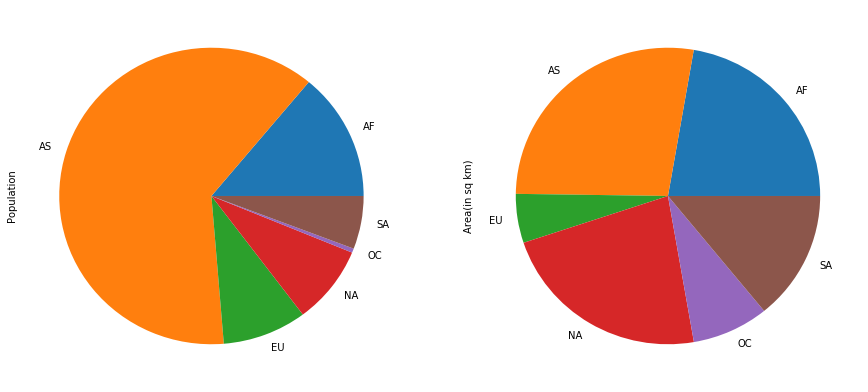

In [141]:
fig = plt.figure(figsize=(15,15))
p1 = fig.add_subplot(2,2,1)
merged.groupby('Continent').Population.sum().plot(kind='pie')
p2 = fig.add_subplot(2,2,2)
merged.groupby('Continent')["Area(in sq km)"].sum().plot(kind='pie')
plt.show()


Veri setinden Türkiye'nin komşularını bulun, bu ülkelerin ve Türkiye'nin GDP ortalamalarını gösteren bir sütun grafik çizin.

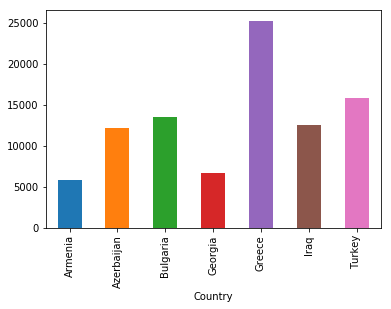

In [142]:
neighbours = merged.loc['Turkey'].neighbours.split(',')
neighbours.append('TR')
merged.loc[merged['CountryCode'].isin(neighbours)].GDP_ortalama.plot(kind='bar')

 
Her ülke için o ülkenin komşu ülkelerinin ortalama GDP değerlerinin ortalamasını hesaplayarak yeni bir seri oluşturunuz (eğer bir ülkenin komuşusu yoksa kendi GDP ortalamasını alınız) ve komşuları ile en fazla ortalama GDP farkı olan ilk 20 ülkeyi listeleyin.

In [143]:
NeighboursGDP = pd.Series()
for country, row in merged.iterrows():
    if pd.isnull(row.neighbours):
        neighbourss = [row.CountryCode]
    else :
        neighbourss = row.neighbours.split(',')
        #NeighboursGDP[country] = neighbourss
    avg = merged.loc[merged['CountryCode'].isin(neighbourss)].GDP_ortalama.mean()
    if np.isnan(avg):
        NeighboursGDP[country] =row.GDP_ortalama
    else:
        NeighboursGDP[country] = avg
NeighboursGDP

United Arab Emirates                41800.500000
Antigua and Barbuda                 19916.000000
Albania                             17960.800000
Armenia                             11561.333333
Angola                               2978.100000
Austria                             41990.400000
Australia                           38841.900000
Azerbaijan                           9422.400000
Barbados                            14744.800000
Bangladesh                           3965.000000
Belgium                             50308.900000
Burkina Faso                         1712.340000
Bulgaria                            16848.350000
Bahrain                             41815.300000
Burundi                              1230.000000
Benin                                1984.275000
Brazil                              11134.385714
Bahamas                             23329.300000
Bhutan                               6079.750000
Botswana                             6697.500000
Belarus             

In [144]:
GDPDiff = pd.Series()
for country,row in merged.iterrows():
    diff = row.GDP_ortalama - NeighboursGDP[country]
    diff = round(diff, 1)
    GDPDiff[country] = [abs(diff),'+'] if diff >0 else [abs(diff),'-']
GDPDiff

United Arab Emirates                [37247.9, +]
Antigua and Barbuda                     [0.0, -]
Albania                              [9995.7, -]
Armenia                              [5784.2, -]
Angola                               [2681.5, +]
Austria                              [1272.5, -]
Australia                               [0.0, -]
Azerbaijan                           [2771.5, +]
Barbados                                [0.0, -]
Bangladesh                           [1663.2, -]
Belgium                             [11939.0, -]
Burkina Faso                          [410.5, -]
Bulgaria                             [3335.3, -]
Bahrain                                 [0.0, -]
Burundi                               [473.9, -]
Benin                                 [244.7, -]
Brazil                               [2252.1, +]
Bahamas                                 [0.0, -]
Bhutan                                [466.2, -]
Botswana                             [5768.7, +]
Belarus             

In [145]:
GDPDiff.sort_values(ascending=False).head(20)

Luxembourg              [45563.1, +]
United Arab Emirates    [37247.9, +]
Norway                  [21406.7, +]
Oman                    [21058.2, -]
United States           [20469.9, +]
Jordan                  [18705.4, -]
Israel                  [17611.6, +]
Morocco                 [15496.0, -]
Equatorial Guinea       [15357.2, +]
Lebanon                 [14857.0, -]
Switzerland             [14482.8, +]
Finland                 [13553.6, -]
Greece                  [13210.1, +]
Kazakhstan              [12472.8, +]
Belgium                 [11939.0, -]
Indonesia               [11852.4, -]
France                  [10965.2, -]
Iraq                    [10374.3, -]
Albania                  [9995.7, -]
Malaysia                 [9654.8, +]
dtype: object


Ülkelerin yüzey ölçümü ile nüfusları arasındaki ilişkiyi gösteren bir dağılım (scatter) grafiği çizin. Baloncuklara ülke isimlerini ekleyin.

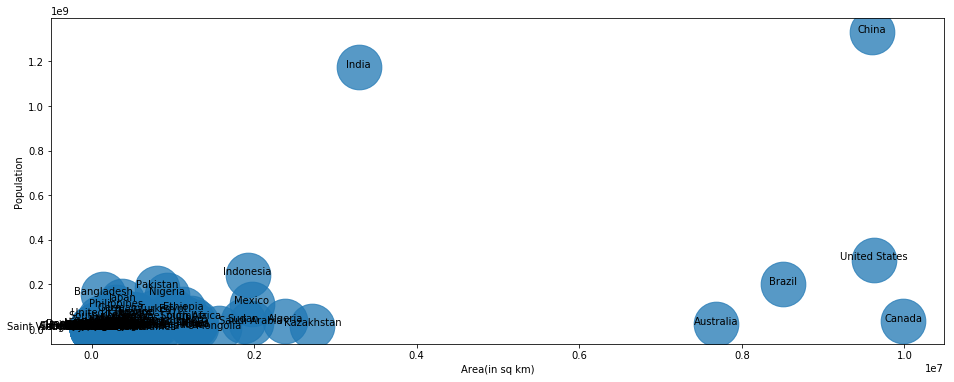

In [146]:
ax = merged.plot(x='Area(in sq km)',y='Population', kind='scatter',s=2000,alpha=0.75, figsize=[16,6])
for i, txt in enumerate(merged.index):
    ax.annotate(txt, [merged['Area(in sq km)'][i], merged['Population'][i]], ha='center')


İnsani gelişmişlik indeksi en yüksek 20 ülkenin, insani gelişmişlik indeksi ile ortalama GDP değerleri arasındaki ilişkiyi gösteren bir dağılım (scatter) grafiği çizin. Baloncukların büyüklüklerini, ortalama GDP değeriyle orantılayın. Baloncuklara ülke isimlerini ekleyin. Baloncukları kıtalara göre renklendirin.

In [147]:
merged['HDI Rank (2015)']=pd.to_numeric(merged['HDI Rank (2015)'])
top20 = merged.sort_values(by=['HDI Rank (2015)']).head(20)
top20

,CountryCode,Country,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,...,2000,2005,2010,2011,2012,2013,2014,2015,GDP_ortalama,KBDYA
Country,,,,,,,,,,,,,,,,,,,,,
Norway,NO,Norway,Oslo,324220.0,5009150,EU,.no,NOK,Krone,47,...,58699.0,63573.0,62946.0,62737.0,63620.0,63483.0,64161.0,64451.0,59758.2,0.064726
Australia,AU,Australia,Canberra,7686850.0,21515754,OC,.au,AUD,Dollar,61,...,35245.0,38819.0,41363.0,41763.0,42541.0,42845.0,43268.0,43655.0,38841.9,0.357266
Switzerland,CH,Switzerland,Bern,41290.0,7581000,EU,.ch,CHF,Franc,41,...,49083.0,51069.0,54183.0,54551.0,54582.0,54912.0,55271.0,55112.0,52010.1,0.005447
Germany,DE,Germany,Berlin,357021.0,81802257,EU,.de,EUR,Euro,49,...,36979.0,37924.0,40665.0,42143.0,43035.0,42266.0,43552.0,44053.0,39593.7,0.004364
Singapore,SG,Singapore,Singapore,692.7,4701069,AS,.sg,SGD,Dollar,65,...,51636.0,61890.0,72018.0,74910.0,75777.0,78046.0,79551.0,80192.0,65317.8,0.000147
Denmark,DK,Denmark,Copenhagen,43094.0,5484000,EU,.dk,DKK,Krone,45,...,41693.0,43919.0,42997.0,43314.0,43120.0,42836.0,43157.0,43415.0,41437.7,0.007858
Netherlands,NL,Netherlands,Amsterdam,41526.0,16645000,EU,.nl,EUR,Euro,31,...,42013.0,43811.0,45843.0,46388.0,45728.0,45368.0,45662.0,46374.0,42850.7,0.002495
Ireland,IE,Ireland,Dublin,70280.0,4622917,EU,.ie,EUR,Euro,353,...,39837.0,47099.0,44684.0,45674.0,45642.0,46182.0,48384.0,51899.0,41669.5,0.015203
Iceland,IS,Iceland,Reykjavik,103000.0,308910,EU,.is,ISK,Krona,354,...,33675.0,39189.0,38905.0,39558.0,39813.0,40975.0,41262.0,42449.0,37225.4,0.333430


In [148]:
colors = np.where(top20.Continent=='AS','r','b')
colors = np.where(top20.Continent=='NA','g',colors)
colors = np.where(top20.Continent=='EU','y',colors)
colors = np.where(top20.Continent=='SA','c',colors)
colors = np.where(top20.Continent=='OC','m',colors)
colors = np.where(top20.Continent=='AF','k',colors)
colors

array(['y', 'm', 'y', 'y', 'r', 'y', 'y', 'y', 'y', 'g', 'g', 'r', 'm',
       'y', 'y', 'r', 'r', 'r', 'y', 'y'], dtype='<U1')

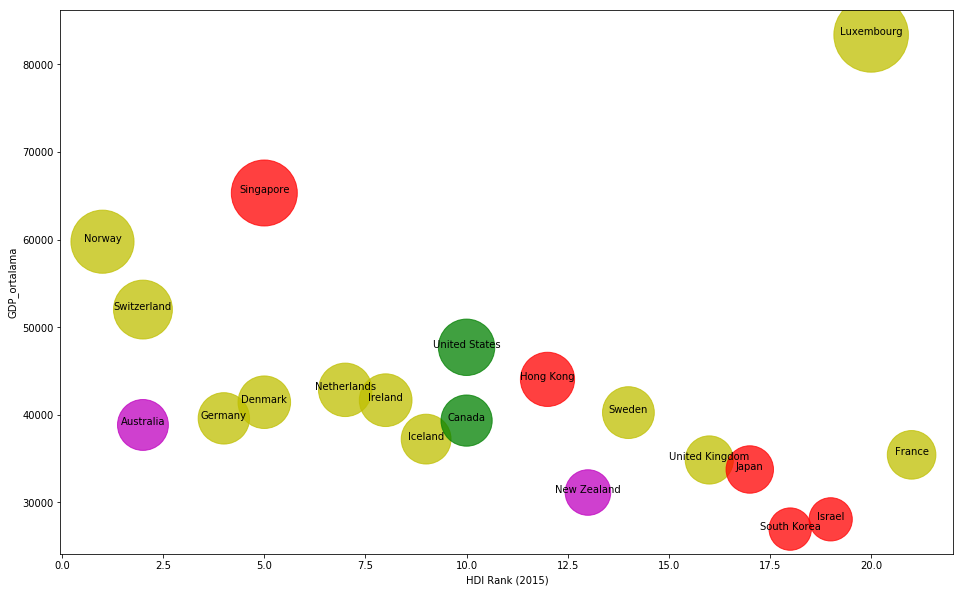

In [149]:
ax = top20.plot(x='HDI Rank (2015)',y='GDP_ortalama',s=top20['GDP_ortalama']/15, kind='scatter',alpha=0.75, figsize=[16,10],c=colors)
for i, txt in enumerate(top20.index):
    ax.annotate(txt, [top20['HDI Rank (2015)'][i], top20['GDP_ortalama'][i]], ha='center')


1990 yılı ile 2015 yılı arasındaki GDP değeri değişimi en yüksek olan 15 ülkenin (1) 1990 ve 2015 GDP değerlerini, (2) fark  değerlerini gösteren sütun grafiklerini içeren bir şekil (figure) çizin.

In [150]:
top15 = pd.Series()
for country, row in merged.iterrows():
    top15[country] = abs(row['2015'] - row['1990'])
top15 = top15.sort_values(ascending=False).head(15)
#top15.plot(kind='bar')

In [151]:
raw_data = {'Country': merged['Country'],
        '1990': merged['1990'],
        '2015': merged['2015']}
ndf= pd.DataFrame(raw_data, columns = ['Country','1990', '2015'])
ndf15 = ndf[ndf.Country.isin(top15.index)]
#ndf15.plot(kind='bar')

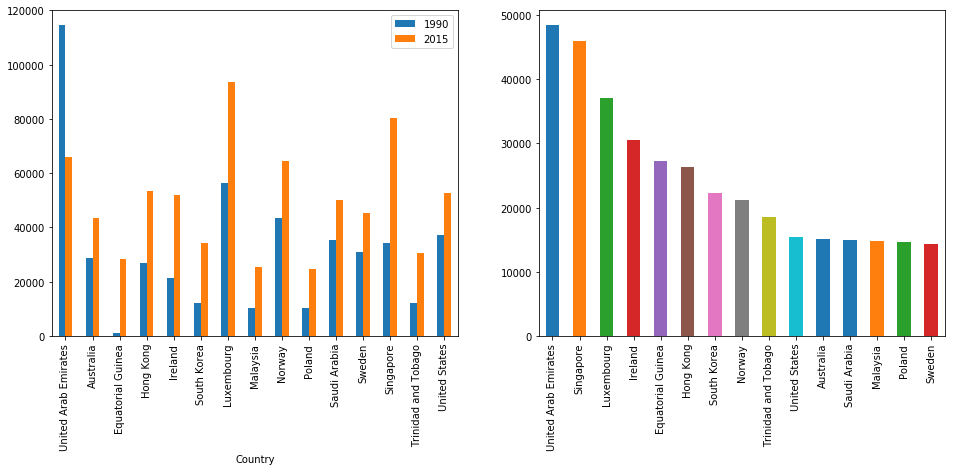

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ndf15.plot(ax=axes[0],kind='bar')
top15.plot(ax=axes[1],kind='bar')


Güney Amerika ('SA') ülkelerinin 1990'dan 2015'e kadar olan GDP değişimlerini yıllara göre gösteren bir çizgi (line) grafik çizin.  

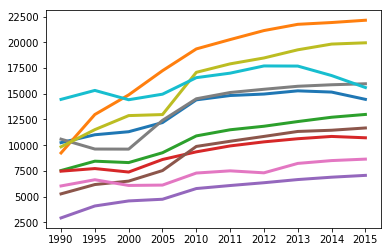

In [153]:
SA = merged[merged['Continent'] == 'SA']
SA = SA.drop(SA.columns[0:13], axis=1)
SAD = SA.drop(SA.columns[10:12], axis=1)
for index, row in SAD.iterrows():
    plt.plot(row, linewidth=3)

In [154]:
SAD = SAD.transpose()
SAD

Country,Brazil,Chile,Colombia,Ecuador,Guyana,Peru,Paraguay,Suriname,Uruguay,Venezuela
1990,10246.0,9244.0,7534.0,7472.0,2928.0,5267.0,6036.0,10584.0,9841.0,14451.0
1995,11012.0,12981.0,8443.0,7726.0,4089.0,6172.0,6639.0,9624.0,11511.0,15323.0
2000,11308.0,14888.0,8308.0,7388.0,4580.0,6507.0,6085.0,9616.0,12875.0,14417.0
2005,12197.0,17240.0,9264.0,8608.0,4743.0,7530.0,6120.0,12410.0,12976.0,14957.0
2010,14406.0,19357.0,10901.0,9352.0,5783.0,9878.0,7290.0,14510.0,17082.0,16563.0
2011,14827.0,20266.0,11497.0,9927.0,6077.0,10379.0,7505.0,15120.0,17905.0,17002.0
2012,14970.0,21142.0,11840.0,10322.0,6349.0,10851.0,7312.0,15434.0,18478.0,17702.0
2013,15282.0,21748.0,12296.0,10626.0,6657.0,11334.0,8227.0,15726.0,19271.0,17690.0
2014,15162.0,21923.0,12715.0,10849.0,6887.0,11451.0,8502.0,15873.0,19828.0,16769.0
2015,14455.0,22145.0,12988.0,10718.0,7064.0,11672.0,8644.0,15970.0,19952.0,15603.0


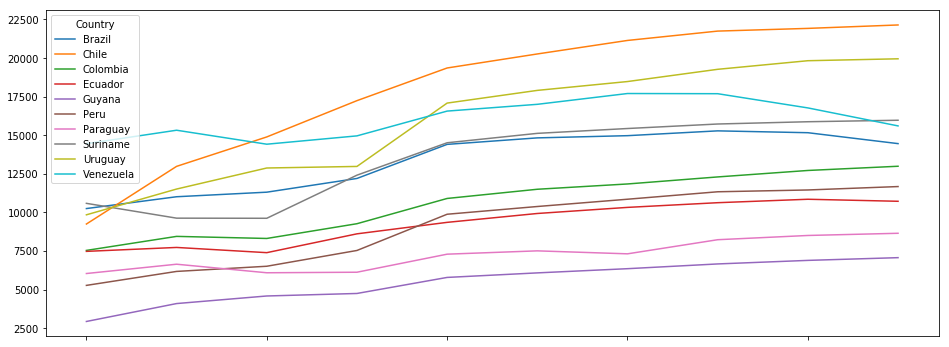

In [155]:
SAD.plot(figsize=(16,6))
plt.show()


Dünya'da en çok sayıda ülkede konuşulan ilk 10 dili (bir dilin ülkelere göre yerelleşmiş türlerini, aynı dil olarak kabul edin) ve konuşuldukları ülke sayılarını gösteren bir sütun grafik çizin.

In [156]:
merged.Languages

Country
United Arab Emirates                                   ar-AE,fa,en,hi,ur
Antigua and Barbuda                                                en-AG
Albania                                                            sq,el
Armenia                                                               hy
Angola                                                             pt-AO
Austria                                                   de-AT,hr,hu,sl
Australia                                                          en-AU
Azerbaijan                                                      az,ru,hy
Barbados                                                           en-BB
Bangladesh                                                      bn-BD,en
Belgium                                                nl-BE,fr-BE,de-BE
Burkina Faso                                                       fr-BF
Bulgaria                                                    bg,tr-BG,rom
Bahrain                                    

In [157]:
LangFreq = {}
for country, row in merged.iterrows():
    langs = row.Languages.split(',')
    editedLangs=[]
    for item in langs:
        if "-"  in item: 
            newItem = item.split('-')
            editedLangs.append(newItem[0])
        else:
            editedLangs.append(item)
    for lang in editedLangs:
        if lang not in LangFreq:
             LangFreq[lang] = 1
        else:
            LangFreq[lang] += 1
LangFreq

{'': 1,
 'af': 2,
 'ak': 1,
 'am': 1,
 'ar': 15,
 'as': 1,
 'av': 1,
 'ay': 1,
 'az': 3,
 'bal': 1,
 'be': 1,
 'bem': 1,
 'ber': 1,
 'bg': 1,
 'bh': 1,
 'bho': 1,
 'bm': 1,
 'bn': 2,
 'br': 1,
 'brh': 1,
 'ca': 3,
 'cmn': 1,
 'co': 2,
 'cy': 1,
 'da': 2,
 'dag': 1,
 'de': 9,
 'diq': 1,
 'dje': 1,
 'doi': 1,
 'dta': 1,
 'dz': 1,
 'ee': 2,
 'el': 3,
 'en': 68,
 'es': 21,
 'eu': 2,
 'fa': 2,
 'ff': 1,
 'fi': 3,
 'fia': 1,
 'fil': 1,
 'fj': 1,
 'fo': 1,
 'fr': 33,
 'frp': 1,
 'fuc': 1,
 'fy': 1,
 'ga': 1,
 'gd': 1,
 'gil': 1,
 'gl': 1,
 'gn': 1,
 'gu': 1,
 'ha': 3,
 'haw': 1,
 'he': 1,
 'hi': 2,
 'hna': 1,
 'hns': 2,
 'hr': 1,
 'hu': 3,
 'hy': 5,
 'hz': 1,
 'id': 1,
 'ig': 1,
 'inc': 1,
 'is': 1,
 'it': 2,
 'iu': 1,
 'ja': 1,
 'jv': 2,
 'ka': 1,
 'kbp': 1,
 'kg': 1,
 'kk': 1,
 'kn': 1,
 'ko': 1,
 'kok': 1,
 'kr': 1,
 'ks': 1,
 'ku': 2,
 'ky': 1,
 'lb': 1,
 'lg': 1,
 'ln': 1,
 'loz': 1,
 'lue': 1,
 'lun': 1,
 'lus': 1,
 'men': 1,
 'mg': 1,
 'mi': 1,
 'mk': 1,
 'ml': 2,
 'mn': 1,
 'mni': 1,


In [158]:
LangFreqD = pd.DataFrame( LangFreq, index=["Counts"] )
LangFreqD

,,af,ak,am,ar,as,av,ay,az,bal,...,vmw,wo,wuu,xh,yao,yo,yue,za,zh,zu
Counts,1,2,1,1,15,1,1,1,3,1,...,1,1,1,1,1,1,2,1,6,1


In [159]:
temp = LangFreqD.transpose()
top10 = temp.sort_values(by='Counts',ascending=False).head(10)
top10

,Counts
en,68
fr,33
es,21
ar,15
ru,10
de,9
zh,6
ur,5
hy,5
pt,5


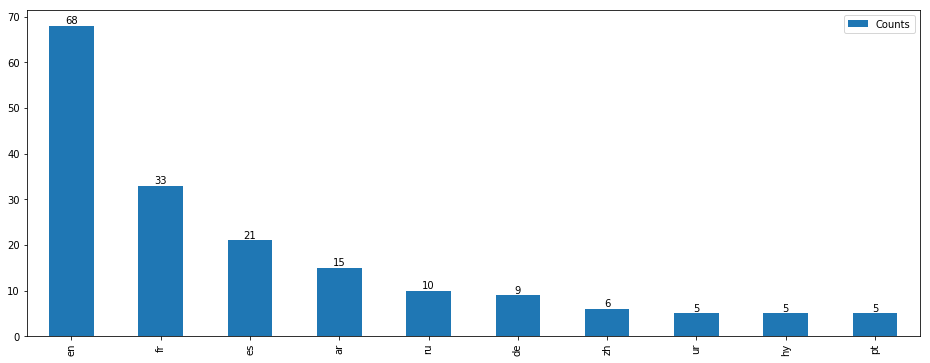

In [160]:
ax = top10.plot(kind='bar',figsize=(16,6))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')